# AIDS Clinical Trials Group Study 
- Dataset Information
For what purpose was the dataset created?

To examine the performance of two different types of AIDS treatments

- Who funded the creation of the dataset?
    - AIDS Clinical Trials Group of the National Institute of Allergy and Infectious Diseases
    - General Research Center units funded by the National Center for Research Resources

- What do the instances in this dataset represent?
    - Health records
    - AIDS patients
    - US only

- Are there recommended data splits?
    - Cross validation or a single train-test split could be used.

- Does the dataset contain data that might be considered sensitive in any way?
    - Ethnicity (race)
    - Gender

- Was there any data preprocessing performed?
    - No

- Has Missing Values?
    - No

### Importing Packages

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from ucimlrepo import fetch_ucirepo 
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

### Loading Dataset

In [2]:
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 

print(type(X),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


## Exploratory data analysis

### Information about attributes

In [3]:
X_info = X.info()
y_info = y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 

### Describing about attibutes

In [4]:
X_describe = X.describe()
y_describe = y.describe()
print(X_describe)

              time          trt          age         wtkg         hemo  \
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000   
mean    879.098177     1.520804    35.248247    75.125311     0.084151   
std     292.274324     1.127890     8.709026    13.263164     0.277680   
min      14.000000     0.000000    12.000000    31.000000     0.000000   
25%     727.000000     1.000000    29.000000    66.679200     0.000000   
50%     997.000000     2.000000    34.000000    74.390400     0.000000   
75%    1091.000000     3.000000    40.000000    82.555200     0.000000   
max    1231.000000     3.000000    70.000000   159.939360     1.000000   

              homo        drugs       karnof       oprior          z30  ...  \
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000  ...   
mean      0.661057     0.131370    95.446470     0.021973     0.550257  ...   
std       0.473461     0.337883     5.900985     0.146629     0.497584  ...   
min       0.00000

### Checking for the null values in Feature var.

In [5]:
X.isnull().sum()

time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
zprior     0
preanti    0
race       0
gender     0
str2       0
strat      0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
dtype: int64

### Checking for the null values in Label var.

In [6]:
y.isnull().sum()

cid    0
dtype: int64

### Checking for N-unique values in Label

In [7]:
y.nunique()

cid    2
dtype: int64

### Checking for value counts in label var.

In [8]:
y.value_counts()

cid
0      1618
1       521
dtype: int64

### Checking for the correlations

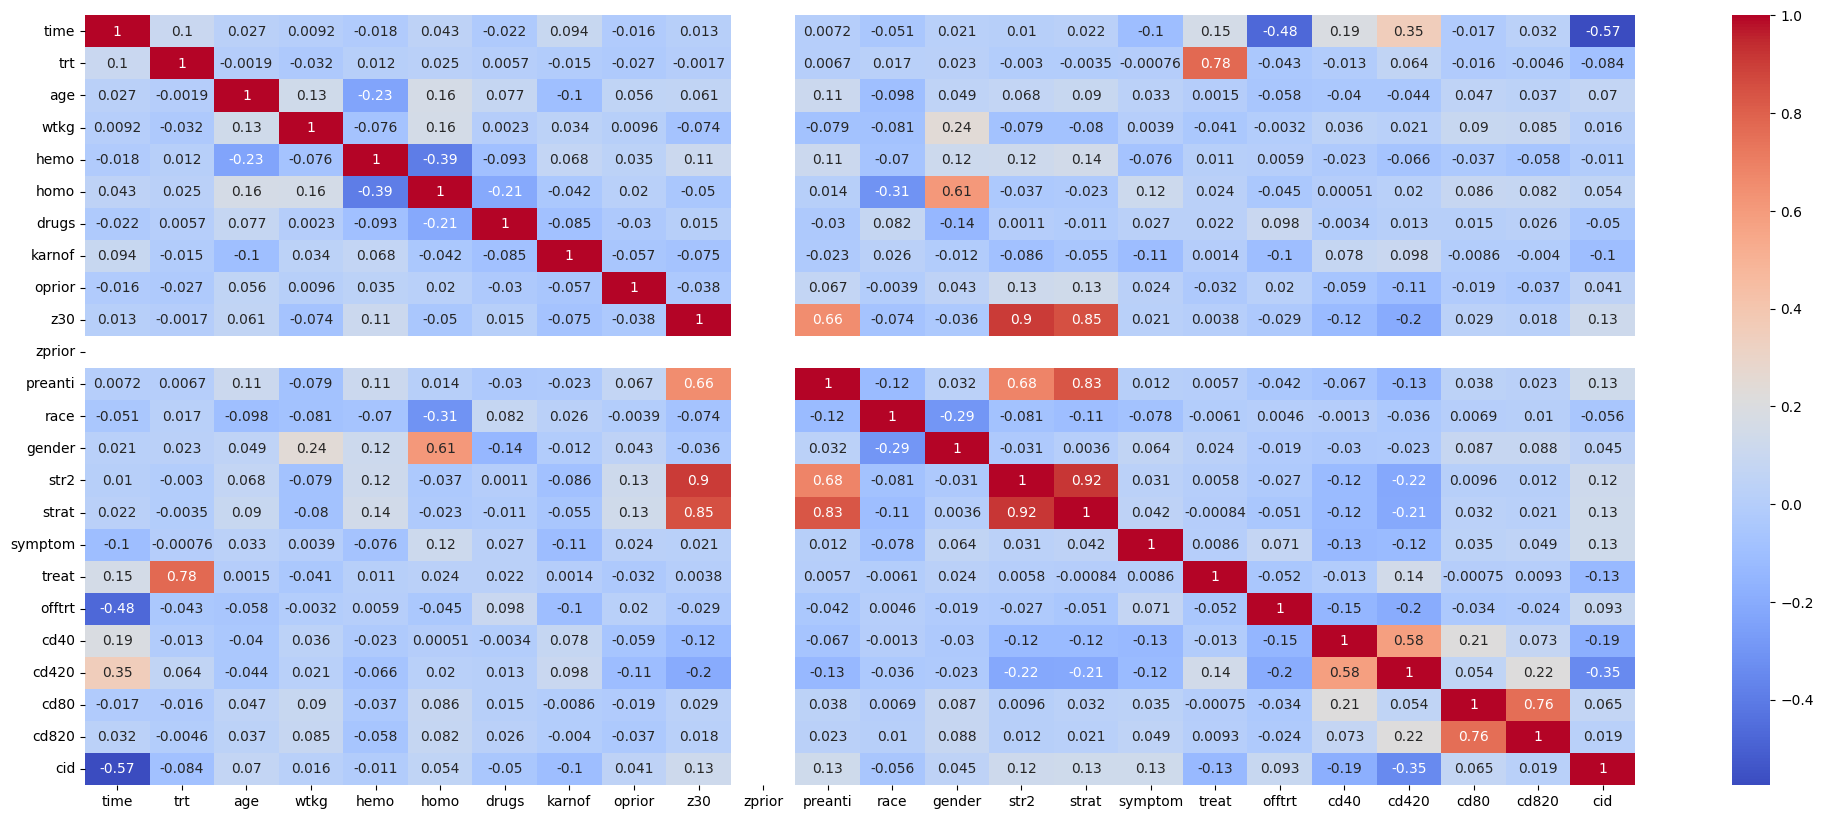

In [9]:
plt.figure(figsize=(25,10)) 
df_correlations = pd.concat([X,y],axis=1).corr()
df_correlations_plot = sns.heatmap(df_correlations,annot=True,cmap='coolwarm')
plt.show()

### Plotting CID VS TIME
- Below shows that if cid is increasing then time is decreasing

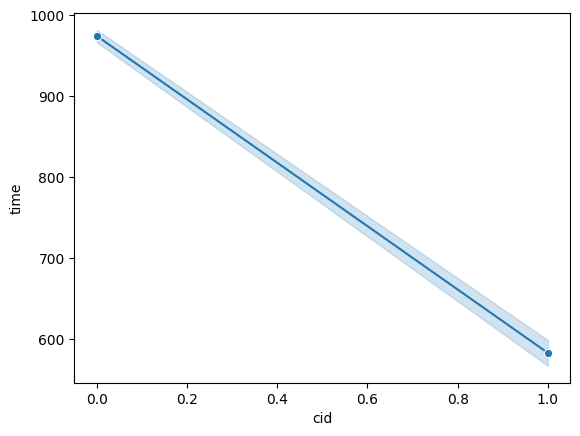

In [10]:
sns.lineplot(x='cid',y='time',data=pd.concat([X,y]),marker='o') 
plt.show()

## Data Preprocessing
- SMOTE (Synthetic minority oversampling technique)
- Checking for an outlier
- Removing outlier
- Filling Null values
- Standardize the data
- Train test split

### SMOTE (Synthetic minority over-sampling technique)

In [11]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X=X,y=y)
print(X_resampled.shape,y_resampled.shape)
print(y_resampled.value_counts())

(3236, 23) (3236, 1)
cid
0      1618
1      1618
dtype: int64


### Checking for an outliers in features

Text(0.5, 1.0, 'Checking for an outliers in features')

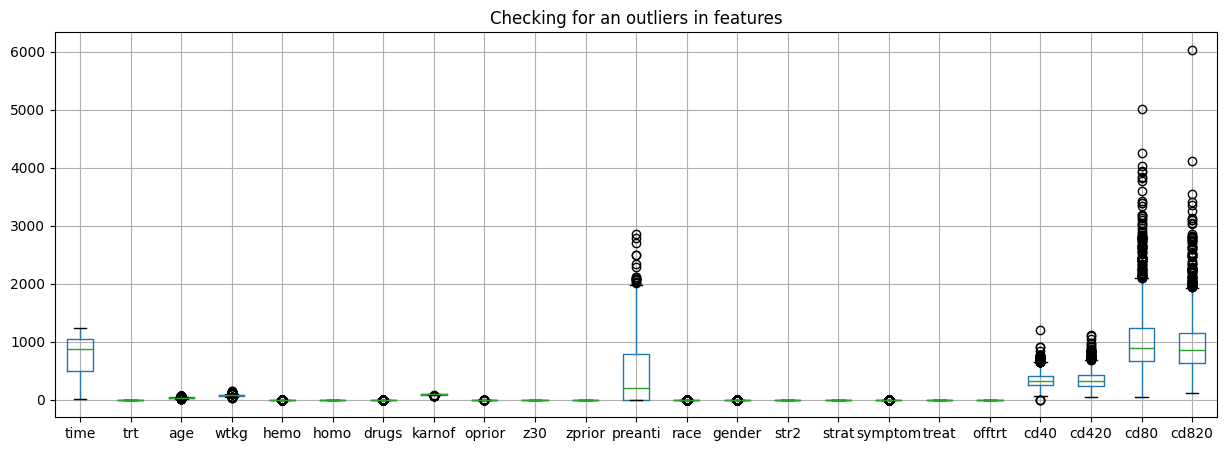

In [12]:
plt.figure(figsize=(15,5))
X_resampled.boxplot()
plt.title("Checking for an outliers in features")

### Checking for an outliers in labels

<AxesSubplot: >

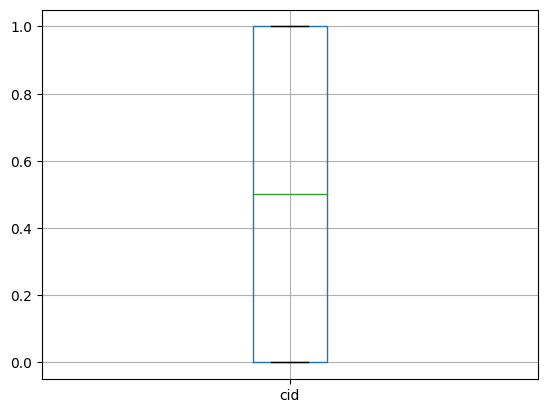

In [13]:
y_resampled.boxplot()

### Removing outliers

Text(0.5, 1.0, 'Checking for an outliers in features (After Removed)')

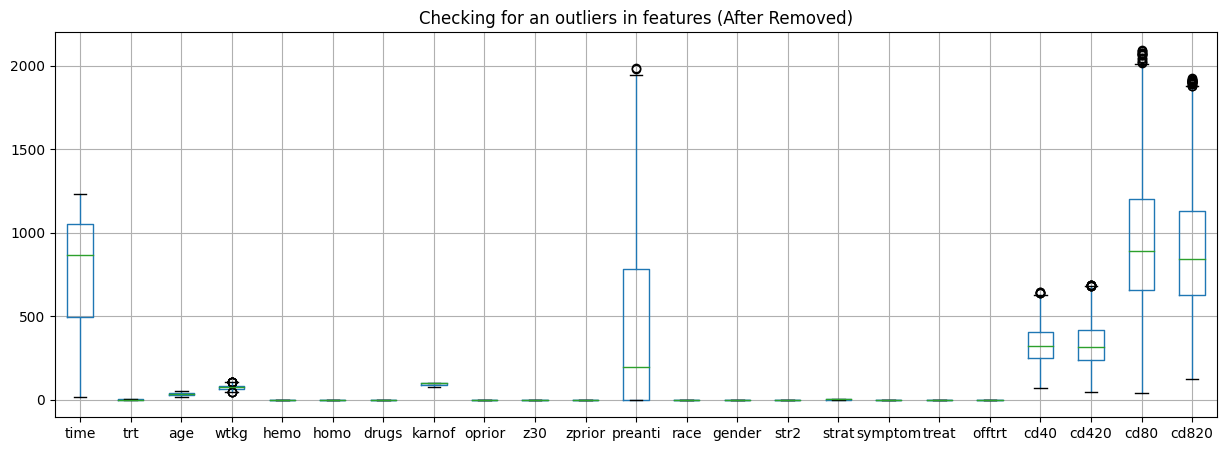

In [14]:
Q1 = X_resampled.quantile(0.25)
Q3 = X_resampled.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_no_outliers = X_resampled[(X_resampled >= lower_bound) & (X_resampled <= upper_bound)]
plt.figure(figsize=(15,5))
X_no_outliers.boxplot()
plt.title("Checking for an outliers in features (After Removed)")

### Checking for the null values in features

In [15]:
X_no_outliers.isnull().sum()

time         0
trt          0
age         84
wtkg        73
hemo       183
homo         0
drugs      284
karnof      13
oprior      47
z30          0
zprior       0
preanti     17
race       670
gender     643
str2         0
strat        0
symptom    464
treat        0
offtrt       0
cd40        44
cd420       56
cd80        92
cd820       88
dtype: int64

### Filling NaN values on Features

In [16]:
imputer = SimpleImputer()
x_no_NaN = imputer.fit_transform(X_no_outliers)
np.isnan(x_no_NaN).sum()

0

### Standardize the data

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_no_NaN)

### Converting Feature & Label to DataFrame

In [18]:
X_prepared = pd.DataFrame(X_scaled,columns=X.columns)
y_prepared = pd.DataFrame(y_resampled,columns=y.columns)

### Train test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared,y_prepared,test_size=0.2,random_state=42)

## Model Building
- We have trained plenty of models, on Logistic Regression and Random Forest Classifier, for this model we will use SVM classifier and we will try to train our data on Support vector machine.
- Model selection 
- Model evaluation
    - Cross validation score
    - Cross validation Predict
    - Confusion matrix
    - Precision, Recall, F1 scoring
- Learning Curve
- Model Hyperparameter tuning
- Model building on test set 
    - Classification report

### Model Selection

In [20]:
svc_clf = SVC(C=5)

### Cross validation score

In [21]:
svc_clf_score = cross_val_score(estimator=svc_clf,X=X_train,y=y_train,scoring='accuracy',cv=3)
print(svc_clf_score.mean())

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8968301550643943


### Cross validation predict

In [22]:
y_val_pred = cross_val_predict(estimator=svc_clf,X=X_train,y=y_train,cv=3) 

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Confusion Matrix

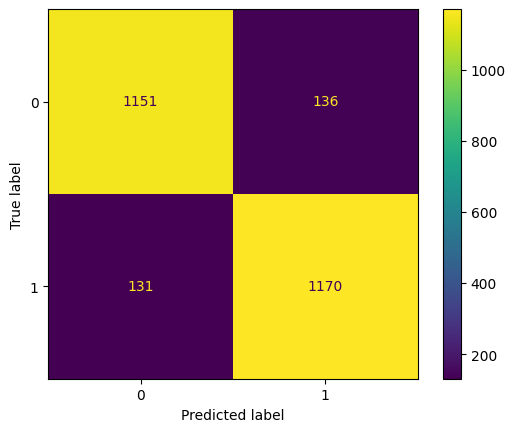

In [23]:
conf_mat = confusion_matrix(y_train,y_val_pred)
conf_plot = ConfusionMatrixDisplay(conf_mat)
conf_plot.plot()
plt.show()

### Precision, Recall, F1 score

In [24]:
precision = precision_score(y_train,y_val_pred)
recall = recall_score(y_train,y_val_pred)
f1_score = f1_score(y_train,y_val_pred)
print(precision)
print(recall)
print(f1_score)

0.8958652373660031
0.8993082244427364
0.8975834292289989


### Model Hyperparameter Tuning

In [32]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf'],     # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # Kernel coefficient (only for 'rbf' and 'poly')
}

grid_search = GridSearchCV(estimator=svc_clf,param_grid=param_grid,return_train_score=True,scoring='accuracy',cv=3)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.8941273046146511
SVC(C=10, gamma=0.1)


### Model building on test set

In [34]:
final_model = grid_search.best_estimator_
y_test_pred = final_model.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       331
           1       0.89      0.93      0.91       317

    accuracy                           0.91       648
   macro avg       0.91      0.91      0.91       648
weighted avg       0.91      0.91      0.91       648



### `NOTE:` End to End ML Project AIDS Clinical Trails Group Study dataset has done. You can visit: **www.github.com/itechdp/ML-beyond-binary** and for more projects.